*****************************************************************************************************
## The notebook will cover Supervised learning models :

1. Basic classifiers with the extracted features like Logistics Regression
2. Trees & Ensemble Models (Random forest, XG boost)
3. MLP(NN,Keras)
4. Run Gridsearchcv to hyperparameter tune selected base model.
5. Model evaluation and selection (Precision Recall, ROC AUC curve.
6. Feature importance
7. Sensitivity analysis
8. Learning Curve
9. Validation curve
10. Prediction on actual test set
*******************************************************************************************************************

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# import sklearn libraries
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction import text
# from scipy.sparse import hstack, vstack
RANDOM_SEED = 42

import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,datetime

import seaborn as sns
sns.set_theme()
import Capstone_Data_Vis_Common as datavis
import Capstone_Feature_Extraction as feature_extraction
import Capstone_Data_Prep_TRAIN_TEST_SPLIT_with_survey_data as dataprep
import Capstone_Utilities as utility

from scipy.signal import argrelextrema

import warnings
warnings.filterwarnings('ignore')


In [2]:
#check for all the files at the repository location
file_path = '/scratch/siads699w23_class_root/siads699w23_class/team8_cpastone_2023/'
files = os.listdir(file_path)
files

['df_final_features.csv',
 'data_with_eda_emg_features_250ms.csv',
 'Capstone_final_TEST_dataset_for_ml_50ms.csv',
 'chest_data_with_label_12_subjects_ALL_DATA_with_survey_and_Anomaly.csv',
 'Capstone_699_Data Wrangling_Visualization_Feature_Model_Biswajit.ipynb',
 'Capstone_final_dataset_for_ml_50ms.csv',
 'Survey_Data_Clean.csv',
 '.ipynb_checkpoints',
 'subject_personal_info.xlsx',
 'data_raw_filtered_stats_50ms.csv',
 'chest_data_with_label_3_subjects_TEST_DATA_with_survey.csv',
 'data_pkl',
 'final_dataset_ACC_EDA_ECG_50ms.csv',
 'survey_ref_table_subject_responses.xlsx',
 'Capstone_Data_Vis_Common.py',
 'survey_ref_table_subject_responses.csv',
 'data_with_eda_features_50ms.csv',
 '.~Capstone_Data_Vis_Common.py',
 'Capstone_Data_Prep_TRAIN_TEST_SPLIT_with_survey_data.py',
 'data_with_acc_features_50ms.csv',
 'Capstone_NN_Training_Data_Inputs_non_scaled_version_100ms.csv',
 'chest_data_with_label_15_subjects_ALL_DATA_with_survey.csv',
 'chest_data_with_label_12_subjects_TRAIN_DATA

#### Load  Data for ML Work

In [3]:
### we can directly map the file Capstone_final_dataset_for_ml_50ms.csv created by master notebook 
#to create the dataframe


wesad_df = pd.read_csv('final_data_ml_50ms.csv',index_col=[0])
wesad_df.head()

,Unnamed: 0.1,subject,label,time,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,0,2,1,1970-01-01 00:00:00.000,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
1,1,2,1,1970-01-01 00:00:00.050,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
2,2,2,1,1970-01-01 00:00:00.100,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
3,3,2,1,1970-01-01 00:00:00.150,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
4,4,2,1,1970-01-01 00:00:00.200,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029


In [4]:
wesad_df=utility.Format_Data(wesad_df)
print(wesad_df.shape)
print(list(wesad_df.columns))
wesad_df.head()

(718277, 88)
['Unnamed: 0.1', 'ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age', 'height', 'weight', 'gender', 'dominant_hand', 'seconds', 'ACC_1_mean', 'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std', 'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min', 'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean', 'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min', 'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean', 'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean', 'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num', 'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean', 'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy', 'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean', 'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'tonic_mean', 'tonic_std', 'tonic_min', 'tonic_max', 'tonic_energy', 'tonic_peaks', 'tonic_rms', 'phasic_m

,Unnamed: 0.1,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,...,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,label
0,0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,29.119919,1.025521,27.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
1,1,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,29.119755,0.710013,27.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
2,2,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,29.125584,0.327802,27.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
3,3,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,29.133441,-0.066877,27.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
4,4,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,29.122919,-0.490505,27.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1


In [5]:
# drop the 'Country' column
wesad_df = wesad_df.drop('Unnamed: 0.1', axis=1)
print(wesad_df.shape)
print(list(wesad_df.columns))
wesad_df.head()

(718277, 87)
['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age', 'height', 'weight', 'gender', 'dominant_hand', 'seconds', 'ACC_1_mean', 'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std', 'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min', 'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean', 'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min', 'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean', 'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean', 'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num', 'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean', 'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy', 'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean', 'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'tonic_mean', 'tonic_std', 'tonic_min', 'tonic_max', 'tonic_energy', 'tonic_peaks', 'tonic_rms', 'phasic_mean', 'phasic_st

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,label
0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,29.119919,1.025521,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
1,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,29.119755,0.710013,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
2,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,29.125584,0.327802,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
3,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,29.133441,-0.066877,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
4,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,29.122919,-0.490505,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1


#### ML activities

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# # Load the preprocessed WESAD dataset
# wesad_df = pd.read_csv('wesad_preprocessed.csv')

# Get the feature and target columns
X = wesad_df.drop(['label'], axis=1)
y = wesad_df['label']

# Split the dataset into training and testing sets using an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)


Training set shape: (574621, 86) (574621,)
Testing set shape: (143656, 86) (143656,)


In [7]:
###Scaling the dataset
# Scale the X "Train" features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)

# Scale the X "Test" features between 0 and 1
X_test = scaler.transform(X_test)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)      
print(y_train.shape)

(574621, 86)
(143656, 86)
(143656,)
(574621,)


#### Dummy Classifier

In [9]:
dum_clf1 = DummyClassifier(random_state = RANDOM_SEED,strategy="uniform")
dum_clf1.fit(X_train, y_train)

dum_clf2 = DummyClassifier(random_state = RANDOM_SEED,strategy="most_frequent")
dum_clf2.fit(X_train, y_train)
print('Predicting Emotional state')
print('Accuracy of dummy classifier with strategy Uniform on training set: {:}'
     .format(dum_clf1.score(X_train, y_train)))
print('Accuracy of dummy classifier with strategy most_frequent on test set: {:}'
     .format(dum_clf2.score(X_test, y_test)))

Predicting Emotional state
Accuracy of dummy classifier with strategy Uniform on training set: 0.2505268690145331
Accuracy of dummy classifier with strategy most_frequent on test set: 0.3902238681294203


In [10]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression().fit(X_train, y_train)
print('Predicting Emotional state')
print('Accuracy of Logistic regression classifier on training set: {:}'
     .format(lr_clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:}'
     .format(lr_clf.score(X_test, y_test)))

Predicting Emotional state
Accuracy of Logistic regression classifier on training set: 0.5802555075432329
Accuracy of Logistic regression classifier on test set: 0.5793283956117391


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.6405787466869467
Accuracy of Decision Tree classifier on test set: 0.6387968480258395


In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler


scaler = MaxAbsScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Predicting Emotional state')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nn_clf .score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nn_clf .score(X_test_scaled, y_test)))

Predicting Emotional state
Accuracy of NN classifier on training set: 0.82
Accuracy of NN classifier on test set: 0.82


In [13]:
##After Hypertuning the MLP classifier
#hidden_layer_sizes=(50,), activation='relu', solver='adam', alpha=0.0001,learning_rate='adaptive', random_state=0

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler


scaler = MaxAbsScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_clf = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', alpha=0.0001, 
                       learning_rate='adaptive', random_state=0).fit(X_train_scaled, y_train)
print('Predicting Emotional state')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nn_clf .score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nn_clf .score(X_test_scaled, y_test)))

Predicting Emotional state
Accuracy of NN classifier on training set: 1.00
Accuracy of NN classifier on test set: 1.00


In [14]:
from sklearn.ensemble import RandomForestClassifier

# initialize the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
clf.fit(X_train, y_train)

# predict on train and test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# calculate the accuracy score
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:}'.format(train_acc))
print('Accuracy of Random Forest classifier on test set: {:}'.format(test_acc))


Accuracy of Random Forest classifier on training set: 1.0
Accuracy of Random Forest classifier on test set: 1.0


In [15]:
####NaiveBayes
from sklearn.naive_bayes import BernoulliNB
import time

start_time = time.time()

nbclf = BernoulliNB().fit(X_train, y_train)
print('Predicting Emotional state')
print('Accuracy of BernoulliNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of BernoulliNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

end_time = time.time()
total_time = end_time - start_time
print("Total time taken: ", total_time, "seconds")

Predicting Emotional state
Accuracy of BernoulliNB classifier on training set: 0.41
Accuracy of BernoulliNB classifier on test set: 0.41
Total time taken:  2.087545871734619 seconds


In [16]:
#### Gradient Boosting
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import GradientBoostingClassifier
xg_clf = GradientBoostingClassifier(random_state = 0)
xg_clf.fit(X_train_scaled, y_train)

print('Predicting text difficulty (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(xg_clf.score(X_train_scaled, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(xg_clf.score(X_test_scaled, y_test)))

Predicting text difficulty (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 1.00



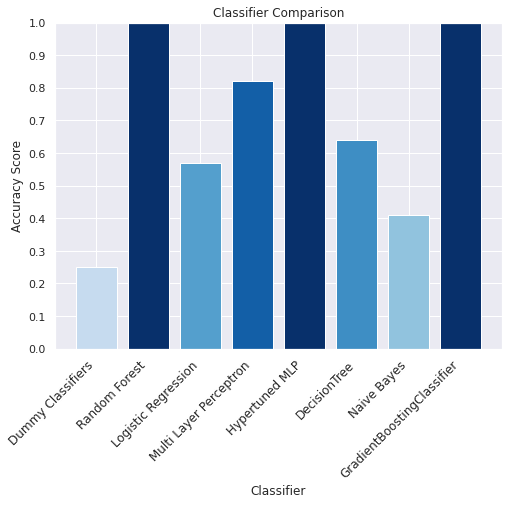

In [17]:
import matplotlib.pyplot as plt

# Classifier names and their scores
classifiers = ['Dummy Classifiers','Random Forest','Logistic Regression','Multi Layer Perceptron','Hypertuned MLP','DecisionTree','Naive Bayes','GradientBoostingClassifier']
scores = [0.25, 1.0, 0.57,0.82,1.0,.64,0.41,1.0]

# Define a color map
cmap = plt.get_cmap('Blues')

# Create a bar chart and update bar colors based on scores
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(classifiers)):
    color = cmap(scores[i]/max(scores))
    ax.bar(classifiers[i], scores[i], color=color)

# Set chart title and axis labels
ax.set_title('Classifier Comparison')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy Score')

# Set x-axis tick labels at 45 degree angle and increase font size
ax.set_xticklabels(classifiers, rotation=45, ha='right', fontsize=12)

# Set y-axis limit and ticks
ax.set_ylim([0, 1])
ax.set_yticks(np.arange(0, 1.1, 0.1))

# Display the bar chart
plt.show()


## ##Grid search and Hypertuning MLP

In [18]:

#Commenting out since the hypertuned paramter is extracted in best_mlp pickel#

# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# import time
# from tqdm import tqdm

# # # Split the data into training and test sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create an MLP classifier
# mlp = MLPClassifier(max_iter=500)

# # Define the hyperparameters to tune and the ranges to try
# hyperparameters = {
#     'hidden_layer_sizes': [(50,), (100,), (150,)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant', 'adaptive']
# }

# # Use GridSearchCV to search for the best hyperparameters
# clf = GridSearchCV(mlp, hyperparameters, cv=5, n_jobs=-1)
# start_time = time.time()
# # clf = tqdm(clf)
# clf.fit(X_train_scaled, y_train)
# end_time = time.time()

# # Print the best hyperparameters
# print('Best hyperparameters:', clf.best_params_)

# # Use the best hyperparameters to create a new MLP classifier
# best_mlp = MLPClassifier(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'],
#                          activation=clf.best_params_['activation'],
#                          solver=clf.best_params_['solver'],
#                          alpha=clf.best_params_['alpha'],
#                          learning_rate=clf.best_params_['learning_rate'],
#                          random_state=42)

# # Train the new MLP classifier on the training set
# best_mlp.fit(X_train_scaled, y_train)

# # Evaluate the performance of the MLP classifier on the test set
# y_pred = best_mlp.predict(X_test_scaled)
# print(classification_report(y_test, y_pred))

# # Print execution time
# print('Total execution time: {:.2f} seconds'.format(end_time - start_time))


In [19]:
import pickle
best_mlp = pickle.load(open('best_mlp.pkl', 'rb'))

In [20]:
y_pred = best_mlp.predict(X_test_scaled)

In [21]:
accuracy_score(y_pred, y_test)

0.9987957342540513

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

[[56045    13     0     0]
 [    0 31598     3     1]
 [    0     0 17944     5]
 [    0     0   151 37896]]
0.9987957342540513


In [23]:
confusion_matrix(y_test, y_pred)

array([[56045,    13,     0,     0],
       [    0, 31598,     3,     1],
       [    0,     0, 17944,     5],
       [    0,     0,   151, 37896]])

#### 
The confusion matrix has four rows and four columns, representing the four possible classes in the classification problem. The rows correspond to the actual classes, and the columns correspond to the predicted classes.

This is a multiclass classification problem with four classes. The entries in the matrix represent the number of instances that fall into each combination of actual and predicted classes.

The diagonal entries represent the number of instances that were classified correctly for each class.
The off-diagonal entries represent the number of instances that were misclassified. For example, in the top row, there were 13 instances that were predicted to belong to class 2 (the second column), but actually belonged to class 1 (the first row).
Here's our interpretation to the matrix:

The first row shows that there were 56045 instances that actually belonged to class 1 (the first column), and all of them were correctly classified as class 1. There were no instances in classes 2, 3, or 4 that were misclassified as class 1.
The second row shows that there were 31598 instances that actually belonged to class 2 (the second column), and all of them were correctly classified as class 2, except for 4 instances that were misclassified as class 1 or class 3.
The third row shows that there were 17944 instances that actually belonged to class 3 (the third column), and all of them were correctly classified as class 3, except for 5 instances that were misclassified as class 4.
The fourth row shows that there were 37896 instances that actually belonged to class 4 (the fourth column), and all of them were correctly classified as class 4, except for 151 instances that were misclassified as class 3.
Overall, the confusion matrix gives you a good sense of how well your classifier is performing for each class, and can be used to calculate metrics such as precision, recall, and F1-score.

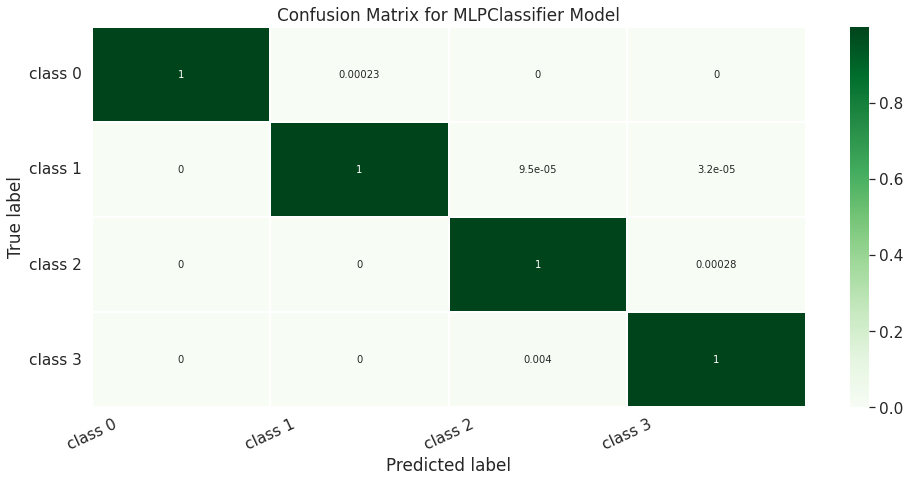

In [24]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['class 0', 'class 1','class 2', 'class 3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for MLPClassifier Model')
plt.show()

Normalized confusion matrix


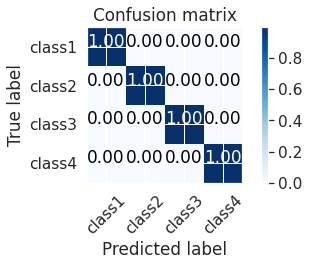

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Example usage
cm = np.array([[56045, 13, 0, 0], [0, 31598, 3, 1], [0, 0, 17944, 5], [0, 0, 151, 37896]])
classes = ['class1', 'class2', 'class3', 'class4']
plot_confusion_matrix(cm, classes, normalize=True)
plt.show()


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56058
           2       1.00      1.00      1.00     31602
           3       0.99      1.00      1.00     17949
           4       1.00      1.00      1.00     38047

    accuracy                           1.00    143656
   macro avg       1.00      1.00      1.00    143656
weighted avg       1.00      1.00      1.00    143656



#### This is the classification report of the model, which provides information on how well the model is performing on each class as well as overall.

Precision: The ratio of true positive predictions to the total predicted positive instances. For example, for class 1, the model predicted all 56058 instances correctly and there were no false positives, so the precision is 1.00 (100%).
Recall: The ratio of true positive predictions to the total actual positive instances. For example, for class 3, there were 17949 actual positive instances and the model correctly predicted 17944 of them, so the recall is 0.99 (99%).
F1-score: The harmonic mean of precision and recall, which provides a balance between the two metrics. It is a good metric to use when the classes are imbalanced.
Support: The number of actual instances of each class.
In addition to the per-class metrics, the report also provides macro-averaged and weighted-averaged metrics for precision, recall, and F1-score, which provide overall performance measures for the model.

Overall, the report shows that the model is performing very well, with perfect precision, recall, and F1-score for each class, as well as overall.

#### Importing Pickle

In [32]:
import pickle
pickle.dump(best_mlp, open("best_mlp.pkl", "wb"))

#### Validation Curve

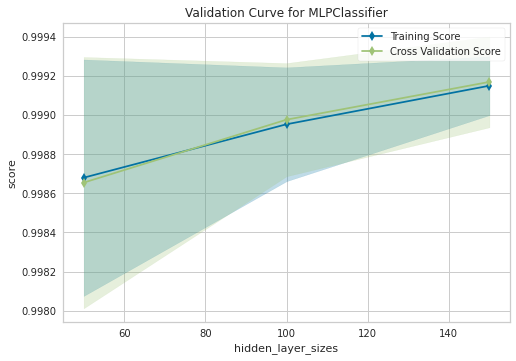

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for MLPClassifier'}, xlabel='hidden_layer_sizes', ylabel='score'>,
                cv=5,
                estimator=MLPClassifier(hidden_layer_sizes=(50,),
                                        learning_rate='adaptive',
                                        random_state=42),
                n_jobs=-1, param_name='hidden_layer_sizes',
                param_range=array([ 50, 100, 150]), scoring='accuracy')


In [39]:

from yellowbrick.model_selection import validation_curve 

# Define the range of hidden layer sizes
hidden_layer_sizes = [(50,), (100,), (150,)]
param_range = [(50,), (100,), (150,)]

# Plot the validation curve
print(validation_curve(best_mlp, X_train_scaled, np.ravel(y_train), param_name="hidden_layer_sizes", n_jobs=-1,
      param_range=[50, 100, 150], cv=5, scoring="accuracy"))

#### Learning Curve

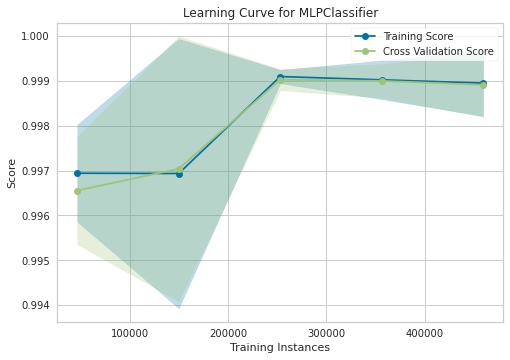

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [40]:
from yellowbrick.model_selection import learning_curve

print(learning_curve(best_mlp, X_train_scaled, y_train, cv=5, scoring='accuracy'))

#### Test the model on unseen data

In [33]:
# Load test set from file
test_df = pd.read_csv('Capstone_final_TEST_dataset_for_ml_50ms.csv')
test_df.head()

,subject,label,time,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,...,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,15,1,1970-01-01 00:00:00.000,0.906806,0.072097,-0.103560,-0.153278,-0.003666,1.422719,33.526420,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
1,15,1,1970-01-01 00:00:00.050,0.900217,0.066109,-0.106011,0.007455,-0.005630,1.424125,33.524947,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
2,15,1,1970-01-01 00:00:00.100,0.903280,0.062154,-0.099771,-0.006536,0.000207,1.421912,33.530004,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
3,15,1,1970-01-01 00:00:00.150,0.904366,0.065137,-0.103537,0.001406,-0.000717,1.420550,33.530740,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
4,15,1,1970-01-01 00:00:00.200,0.903486,0.072971,-0.093983,0.026644,-0.003453,1.424833,33.534019,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029


In [34]:
test_df.columns

Index(['subject', 'label', 'time', 'ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG',
       'EDA', 'Temp',
       ...
       'tonic_rms', 'tonic_entropy', 'phasic_mean', 'phasic_std', 'phasic_min',
       'phasic_max', 'phasic_energy', 'phasic_peaks', 'phasic_rms',
       'phasic_entropy'],
      dtype='object', length=137)

In [35]:
wesad_df_test=utility.Format_Data(test_df)
print(wesad_df_test.shape)
print(list(wesad_df_test.columns))
wesad_df_test.head()

(180949, 87)
['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age', 'height', 'weight', 'gender', 'dominant_hand', 'seconds', 'ACC_1_mean', 'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std', 'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min', 'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean', 'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min', 'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean', 'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean', 'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num', 'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean', 'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy', 'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean', 'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'tonic_mean', 'tonic_std', 'tonic_min', 'tonic_max', 'tonic_energy', 'tonic_peaks', 'tonic_rms', 'phasic_mean', 'phasic_st

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,label
0,0.906806,0.072097,-0.103560,-0.153278,-0.003666,1.422719,33.526420,-2.146432,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
1,0.900217,0.066109,-0.106011,0.007455,-0.005630,1.424125,33.524947,-2.245135,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
2,0.903280,0.062154,-0.099771,-0.006536,0.000207,1.421912,33.530004,-2.340611,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
3,0.904366,0.065137,-0.103537,0.001406,-0.000717,1.420550,33.530740,-2.403085,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
4,0.903486,0.072971,-0.093983,0.026644,-0.003453,1.424833,33.534019,-2.420306,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1


In [37]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# # Load test set from file
# test_df = pd.read_csv('Capstone_final_TEST_dataset_for_ml_50ms.csv')

# Split test set into features and target variables (if applicable)
X_test = wesad_df_test.drop(columns=['label'])
y_test = wesad_df_test['label'] 

# Scale test set features using the same scaler as used on the training set
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Predict class labels for test set using the best MLPClassifier
y_pred = best_mlp.predict(X_test_scaled)

# Calculate accuracy score of predicted class labels using actual target variable (if applicable)
if 'target_column' in wesad_df_test.columns:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.3f}")
else:
    print("Predictions generated for the test set.")


Predictions generated for the test set.


In [38]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.41496775334486513